In [2]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import word2vec
import seaborn

plt.rcParams['font.family'] = 'Osaka'

# ２次元空間へ射影

In [3]:
data = word2vec.Text8Corpus("/Users/TakayukiYagi/Developer/M1/competition/DataComp/Yagi/TTM/data/basket.txt")
model = word2vec.Word2Vec(sentences=data, sg=1, size=200, window=5, negative=5, iter=30, min_count=0)

In [4]:
item_id = np.array(list(model.vocab.keys()))
X = np.vstack([model[item_id[i]] for i in range(len(item_id))])

In [5]:
from sklearn.decomposition import PCA
Z = PCA(n_components=2).fit_transform(X)

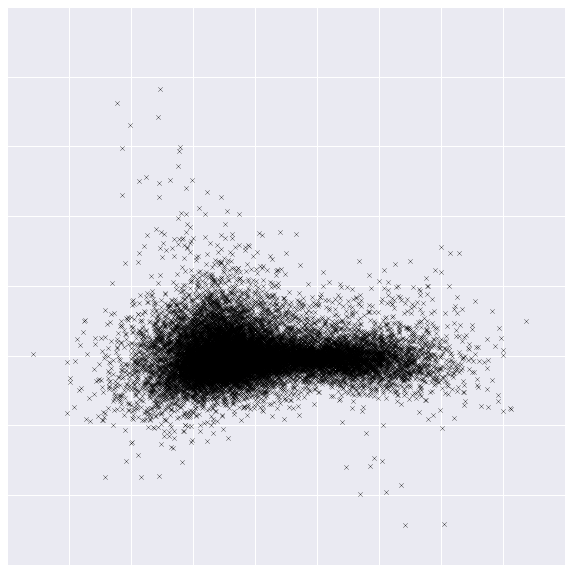

In [81]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(Z[:,0], Z[:,1], s=20, marker='x', c='k')
plt.tick_params(labelleft='off', labelbottom='off')
plt.savefig('fig1')

# k-meansクラスタリング

In [7]:
from sklearn.cluster import KMeans

distortions = []
for i in range(1, 30):
    km = KMeans(n_clusters=i, init='k-means++', random_state=0).fit(X)
    distortions.append(km.inertia_)

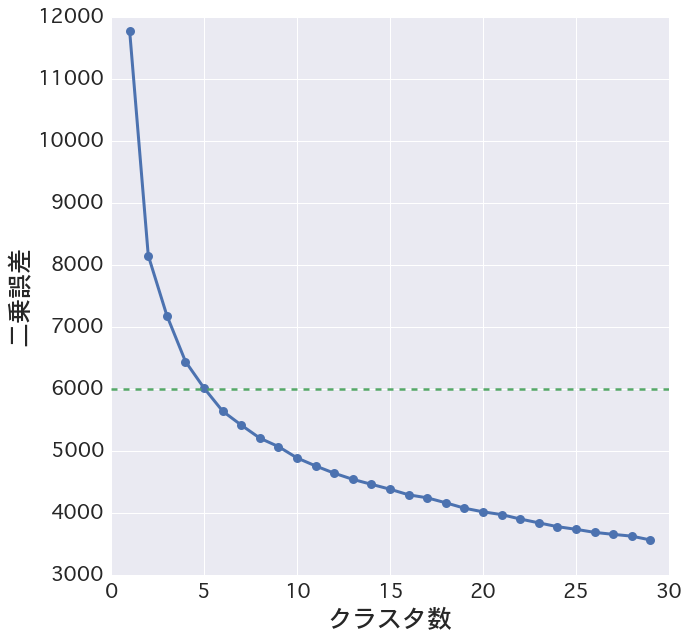

In [82]:
fig = plt.figure(figsize=(10, 10))
plt.plot(range(1, 30), distortions, marker='o',markersize='9', linewidth=3)
plt.plot([0,30], [6000, 6000], linestyle='dashed', linewidth='2.5')
plt.xticks(size='20')
plt.yticks(size='20')
plt.xlabel('クラスタ数', size='25')
plt.ylabel('二乗誤差', size='25')
plt.savefig('fig2')

# x-meansクラスタリング

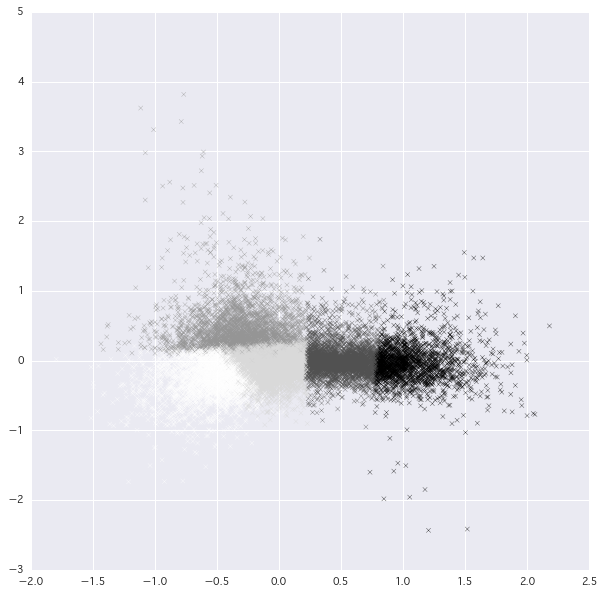

In [41]:
import x_means

xmeans = x_means.XMeans().fit(X)
#print(xmeans.labels_)
#print(xmeans.cluster_centers_)
#print(xmeans.cluster_log_likelihoods_)
#print(xmeans.cluster_sizes_)

fig = plt.figure(figsize=(10, 10))
plt.scatter(Z[:,0], Z[:,1], c=xmeans.labels_, marker='x')

In [44]:
xmeans.labels_

array([0, 3, 2, ..., 1, 2, 4])

In [42]:
print(xmeans.bic_list)

[-17404787.245939083, -14528383.322374938, -4300240.1672245013, -10145134.785820907, -3099324.9244564539, -6656889.9916763268, -4452186.3554045269, -2016116.8534798031]


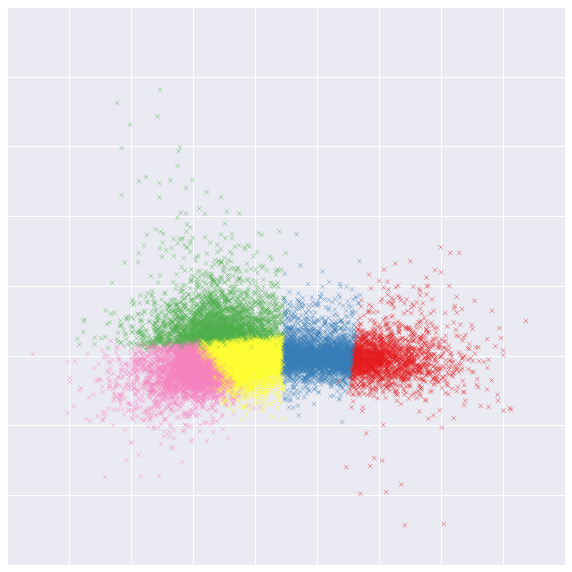

In [83]:
def label2color(label):
    colors = ['#f781bf', '#ffff33','#4daf4a','#377eb8','#e41a1c']
    return colors[label]

fig = plt.figure(figsize=(10, 10))
color_label = list(map(label2color, xmeans.labels_))
plt.scatter(Z[:,0], Z[:,1], s=20,  c=color_label, marker='x')
plt.tick_params(labelleft='off', labelbottom='off')
plt.savefig('fig3')

In [53]:
item_table = pd.read_csv("/Users/TakayukiYagi/Developer/M1/competition/data/item_analyzed.csv")
df = pd.DataFrame(np.array([item_id, xmeans.labels_]).T, columns=['item_id', 'label'], dtype=np.int)
df = pd.merge(df, item_table, left_on='item_id', right_on='new_item_id', how='left').dropna()

In [54]:
df.head()

,item_id_x,label,new_item_id,item_id_y,item_detail_id,color,color_category,size,item_category_1,item_category_2,shop_id
0,289828,0,289828,177836,1,ブラック,ブラック系,ONE SIZE,バッグ,クラッチバッグ,41
1,26912,3,26912,16530,7,グレー,グレー系,MEDIUM,トップス,カーディガン,633
2,638,2,638,367,6,ダークブルー,ブルー系,40,パンツ,デニムパンツ,701
3,326962,1,326962,201809,1,ホワイト,ホワイト系,FREE,トップス,Tシャツ/カットソー,219
4,626372,0,626372,392257,2,ライトグレー,グレー系,FREE,アクセサリー,ブローチ/コサージュ,38


# クラスタごとに集計

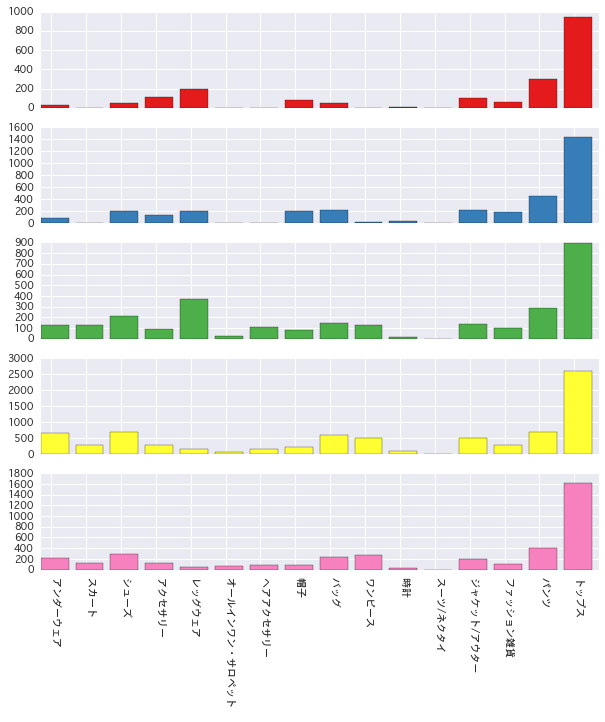

In [91]:
K = 5
colors = ['#f781bf', '#ffff33','#4daf4a','#377eb8','#e41a1c']

cat1_list = list(set(df['item_category_1']))
cat1_count = []

for k in range(K):
    df_tmp = df[df['label']==k]
    cat1_count_tmp = []
    for cat in cat1_list:
        cat1_count_tmp.append(sum(df_tmp['item_category_1']==cat))
    cat1_count.append(cat1_count_tmp)
    
x = np.arange(len(cat1_count[0]))
fig, axes = plt.subplots(K, 1, figsize=(10, 10))

for i in range(K):
    axes[i].bar(x, cat1_count[4-i], color=colors[4-i])
    axes[i].set_xticks(x+0.3)
    if i==4:
        axes[i].set_xticklabels(cat1_list, ha='left', rotation = 270, size='10')
    else:
        axes[i].tick_params(labelbottom='off')
plt.savefig('fig4')

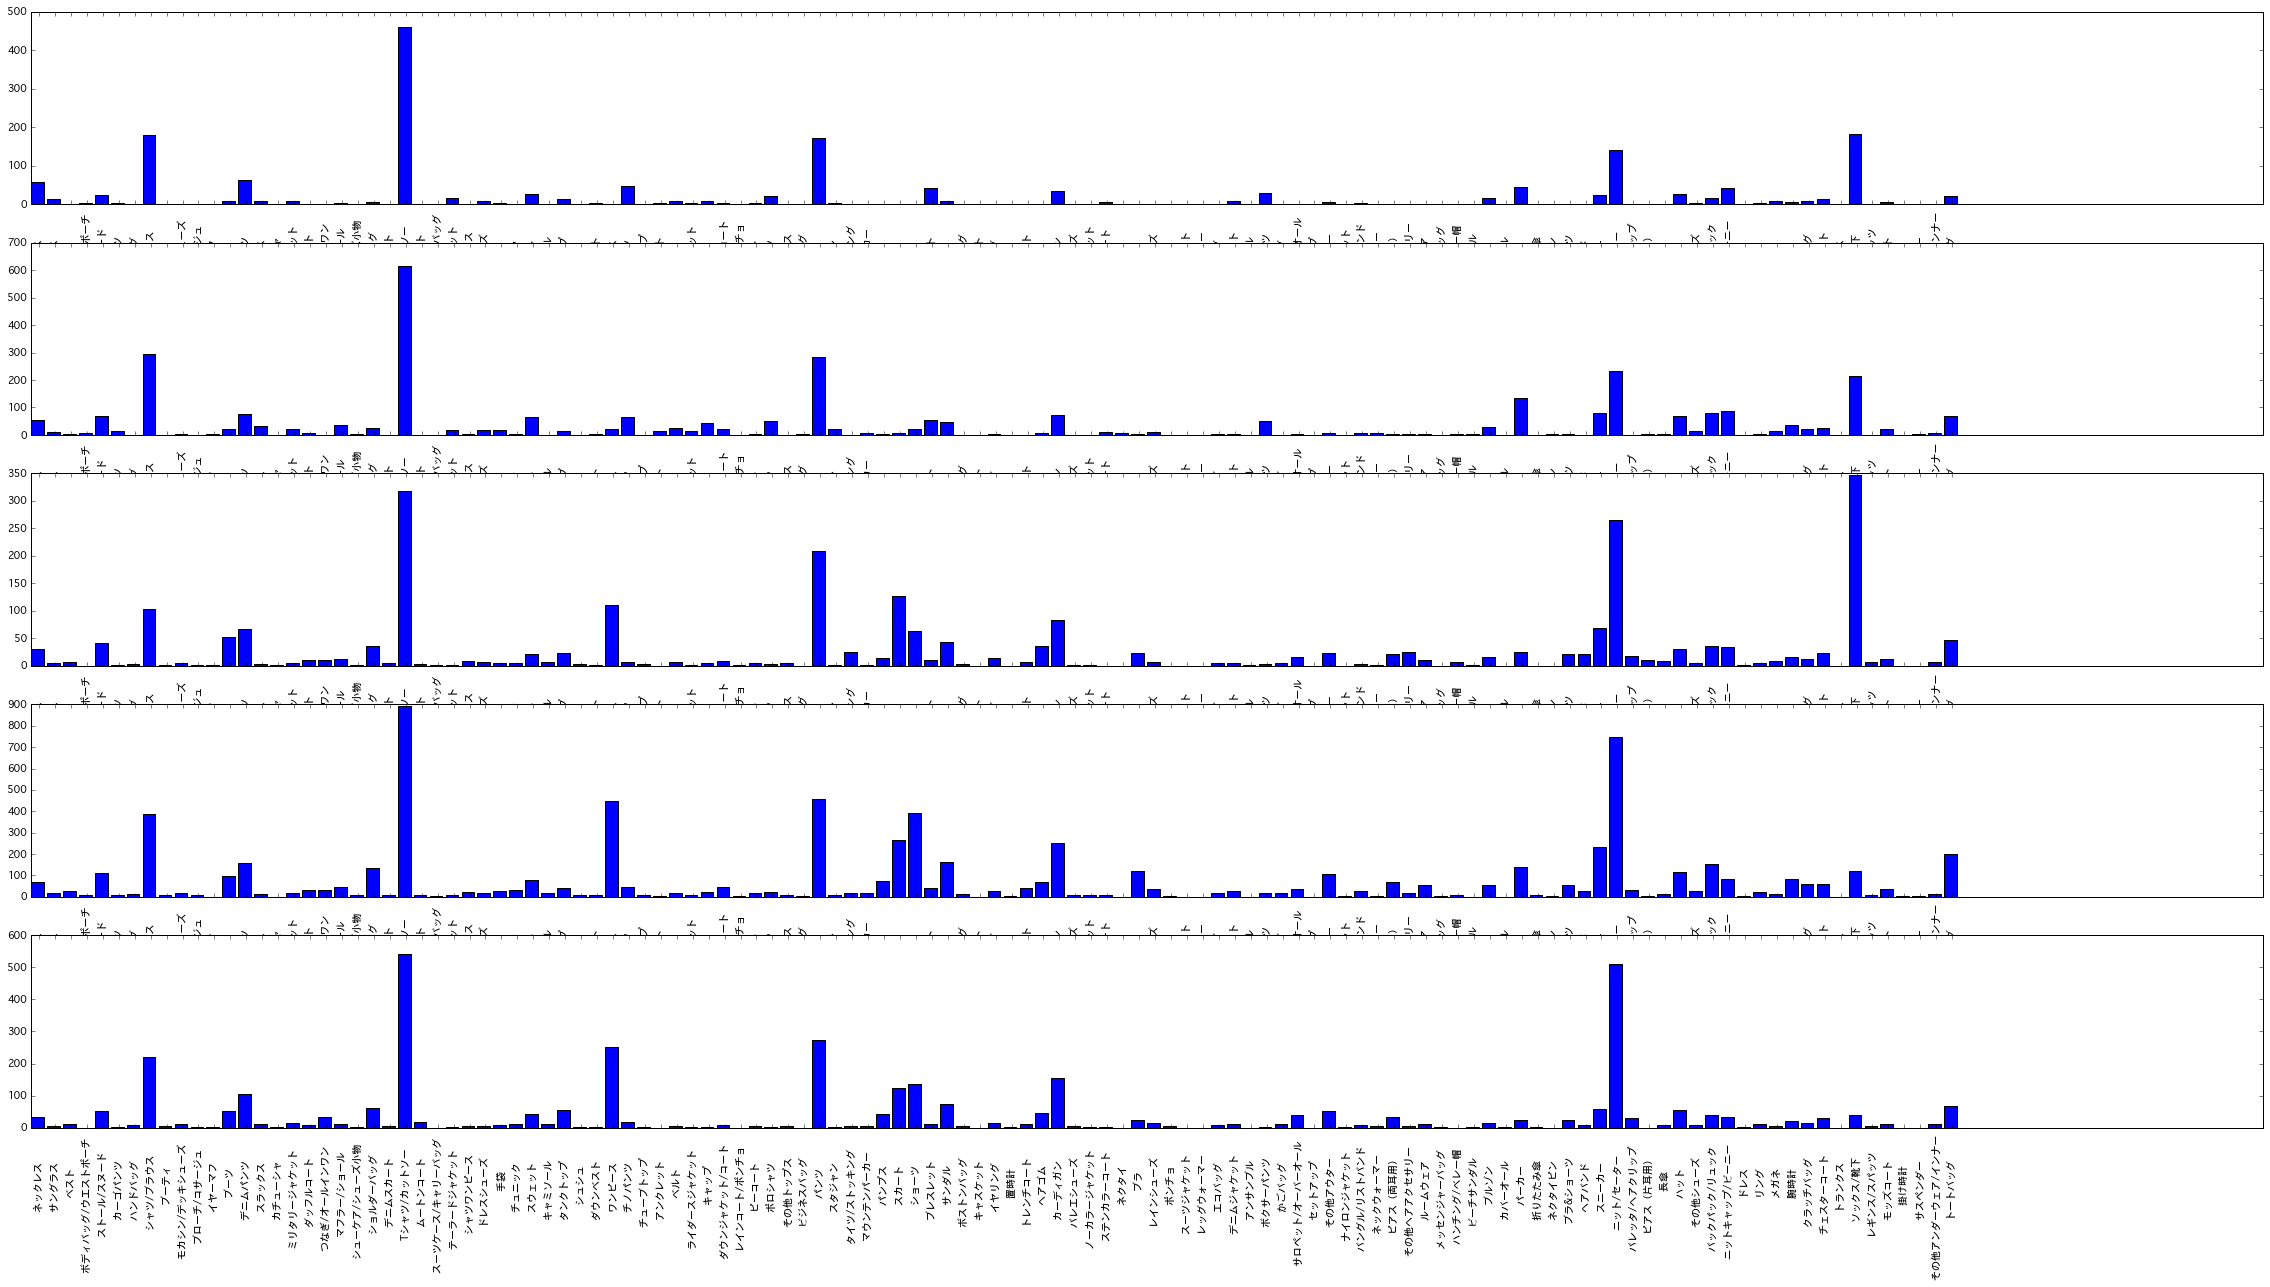

In [223]:
K = 5

cat2_list = list(set(df['item_category_2']))
cat2_count = []

for k in range(K):
    df_tmp = df[df['label']==k]
    cat2_count_tmp = []
    for cat in cat2_list:
        cat2_count_tmp.append(sum(df_tmp['item_category_2']==cat))
    cat2_count.append(cat2_count_tmp)
    
x = np.arange(len(cat2_count[0]))
fig, axes = plt.subplots(K, 1, figsize=(40, 20))

for i in range(K):
    axes[i].bar(x, cat2_count[i])
    axes[i].set_xticks(x+0.5)
    axes[i].set_xticklabels(cat2_list, rotation = 90)

plt.savefig('category2')

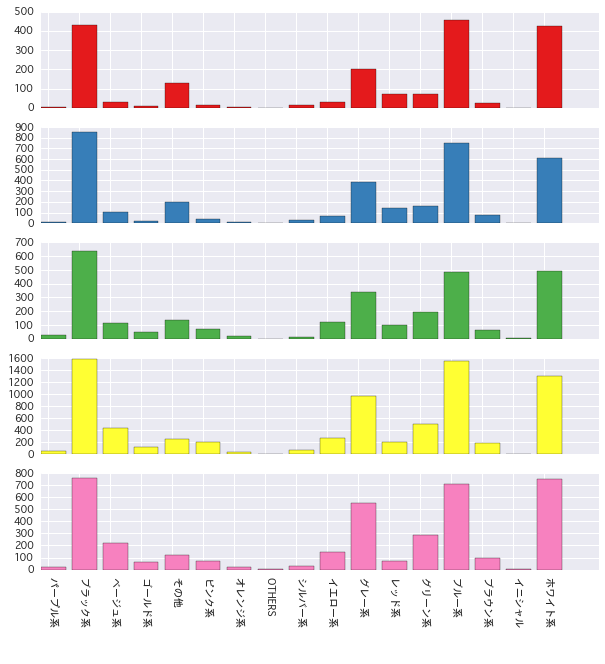

In [103]:
K = 5

col_list = list(set(df['color_category']))
colors = ['#f781bf', '#ffff33','#4daf4a','#377eb8','#e41a1c']
col_count = []

for k in range(K):
    df_tmp = df[df['label']==k]
    col_count_tmp = []
    for col in col_list:
        col_count_tmp.append(sum(df_tmp['color_category']==col))
    col_count.append(col_count_tmp)
    
x = np.arange(len(col_count[0]))
fig, axes = plt.subplots(K, 1, figsize=(10, 10))

for i in range(K):
    axes[i].bar(x, col_count[4-i], color=colors[4-i])
    axes[i].set_xticks(x+0.25)
    axes[i].set_xticklabels(col_list, rotation = 90)
    if i==4:
        axes[i].set_xticklabels(col_list, ha='left', rotation = 270, size='10')
    else:
        axes[i].tick_params(labelbottom='off')
plt.savefig('fig5')